# $PLOTTING$ `multi-level` variables

In [2]:
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as pe
from matplotlib.lines import Line2D

---

In [3]:
import xarray as xr
import xbitinfo as xb

In [4]:
paths = glob.glob('./data/multi-level/*.nc')
dss = [xr.open_dataset(p) for p in paths]
info_per_bit = [xb.get_bitinformation(ds, dim='latitude', implementation="python") for ds in dss]
keepbits = [xb.get_keepbits(ibit, 0.99) for ibit in info_per_bit]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
l_kbits = {}

lvl_c = int(dss[0].level.size)

for i, ds in enumerate(dss):
    l_kbits[i] = {}
    for l in range(lvl_c):
        ds_lvl = ds.isel(level=l)
        info_pbit = xb.get_bitinformation(ds_lvl, dim='latitude', implementation="python")
        kbits = xb.get_keepbits(info_pbit, 0.99)
        v = list(ds.keys())[0]
        l_kbits[i][l] = int(kbits[v])    

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

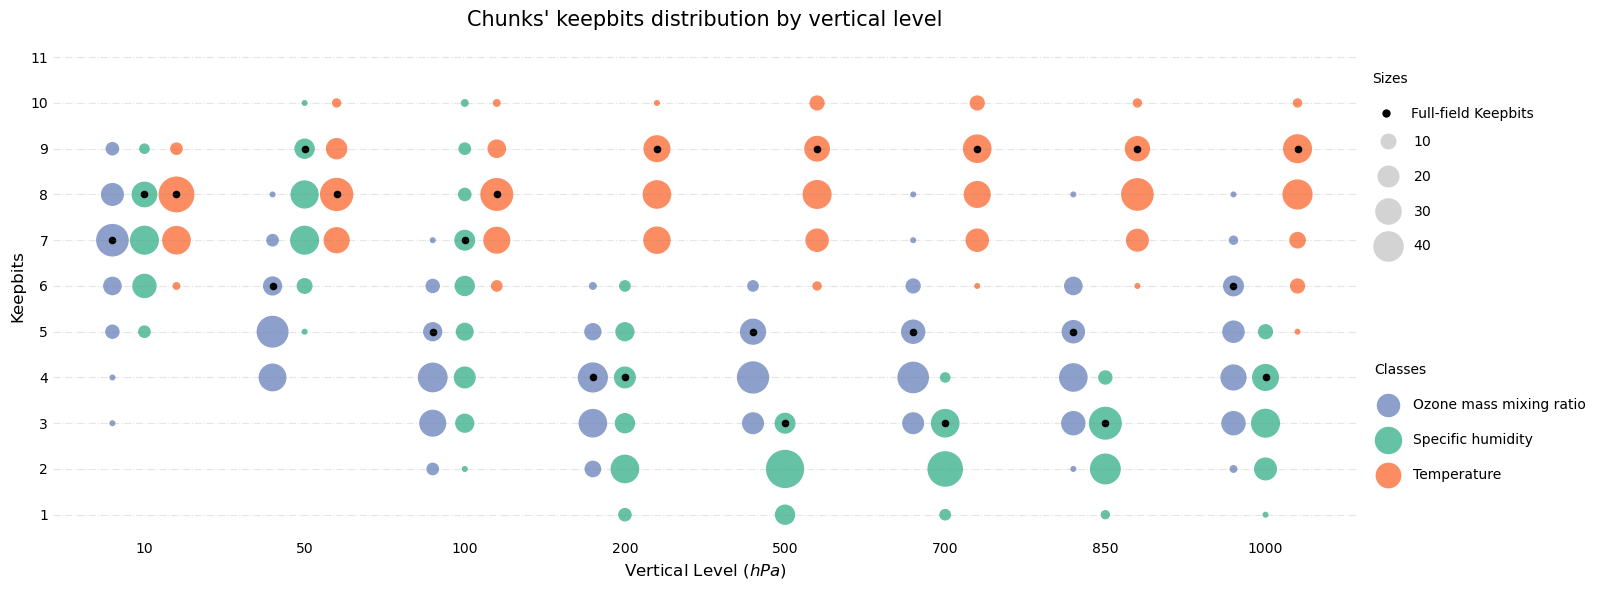

In [102]:
df = pd.read_csv('multi-lvl-go3.csv', index_col=0).apply(pd.Series.value_counts).fillna(0)
df2 = pd.read_csv('multi-lvl-q.csv', index_col=0).apply(pd.Series.value_counts).fillna(0)
df3 = pd.read_csv('multi-lvl-t.csv', index_col=0).apply(pd.Series.value_counts).fillna(0)

for i in range(1,12):
    if i not in df.index: df.loc[i] = 0
    if i not in df2.index: df2.loc[i] = 0
    if i not in df3.index: df3.loc[i] = 0
    
df.sort_index(inplace=True), df2.sort_index(inplace=True), df3.sort_index(inplace=True)

y = np.arange(1, 9)
x = np.arange(1, 12)
xx, yy = np.meshgrid(x, y)

fig, ax = plt.subplots(figsize=(16,6))

sc = ax.scatter(yy-.2, xx, s=df.values.T*11, c='#8da0cb', label='go3')
sc2 = ax.scatter(yy, xx, s=df2.values.T*11, c='#66c2a5', label='q')
sc3 = ax.scatter(yy+.2, xx, s=df3.values.T*11, c='#fc8d62', label='t')

sc_ = ax.scatter([i+.8 for i in l_kbits[2].keys()],
                 [i+1 for i in l_kbits[2].values()], s=20, c='k') #go3
sc2_ = ax.scatter([i+1 for i in l_kbits[0].keys()],
                  [i+1 for i in l_kbits[0].values()], s=20, c='k') #q
sc3_ = ax.scatter([i+1.2 for i in l_kbits[1].keys()],
                  [i+1 for i in l_kbits[1].values()], s=20, c='k', label='J') #t

labels = ['Ozone mass mixing ratio', 'Specific humidity', 'Temperature']

ax.grid(color='grey', linestyle='-.', alpha=0.2, zorder=1)
plt.grid(axis = 'x')
ax.set_frame_on(False)
ax.set_xlabel('Vertical Level ($hPa$)', fontsize=12)
ax.set_ylabel('Keepbits', fontsize=12)
ax.set_xticks(range(1,9))
ax.set_yticks(range(1,12))
ax.set_xticklabels([10, 50, 100, 200, 500, 700, 850, 1000])
ax.set_title(f'Chunks\' keepbits distribution by vertical level', x=0.5, y=1, fontsize=15)

point = Line2D([0], [0], label='Full-field Keepbits', marker='o', markersize=7, 
         markerfacecolor='k', color='w', linestyle='')
legend3 = ax.legend(handles=[point], title="Sizes", loc="upper right",
                    bbox_to_anchor=(1.145,0.95), labelspacing=1.5,
                    frameon=False)
legend3._legend_box.align = "left"
ax.add_artist(legend3)

legend1 = ax.legend(*sc.legend_elements("sizes", num=5, func=lambda s: s/11, color="lightgrey"),
                    loc='upper right', bbox_to_anchor=(1.067,.825), labelspacing=1.5,
                    frameon=False)
legend1._legend_box.align = "left"
ax.add_artist(legend1)

legend2 = ax.legend(labels=labels, title="Classes", loc="lower right",
                    bbox_to_anchor=(1.18,0.1), labelspacing=1.5,
                    frameon=False, borderaxespad=0.)
legend2._legend_box.align = "left"

ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.savefig('beeswarm-chunks-keepbits-dist-lvl.png', dpi=300)
plt.show()

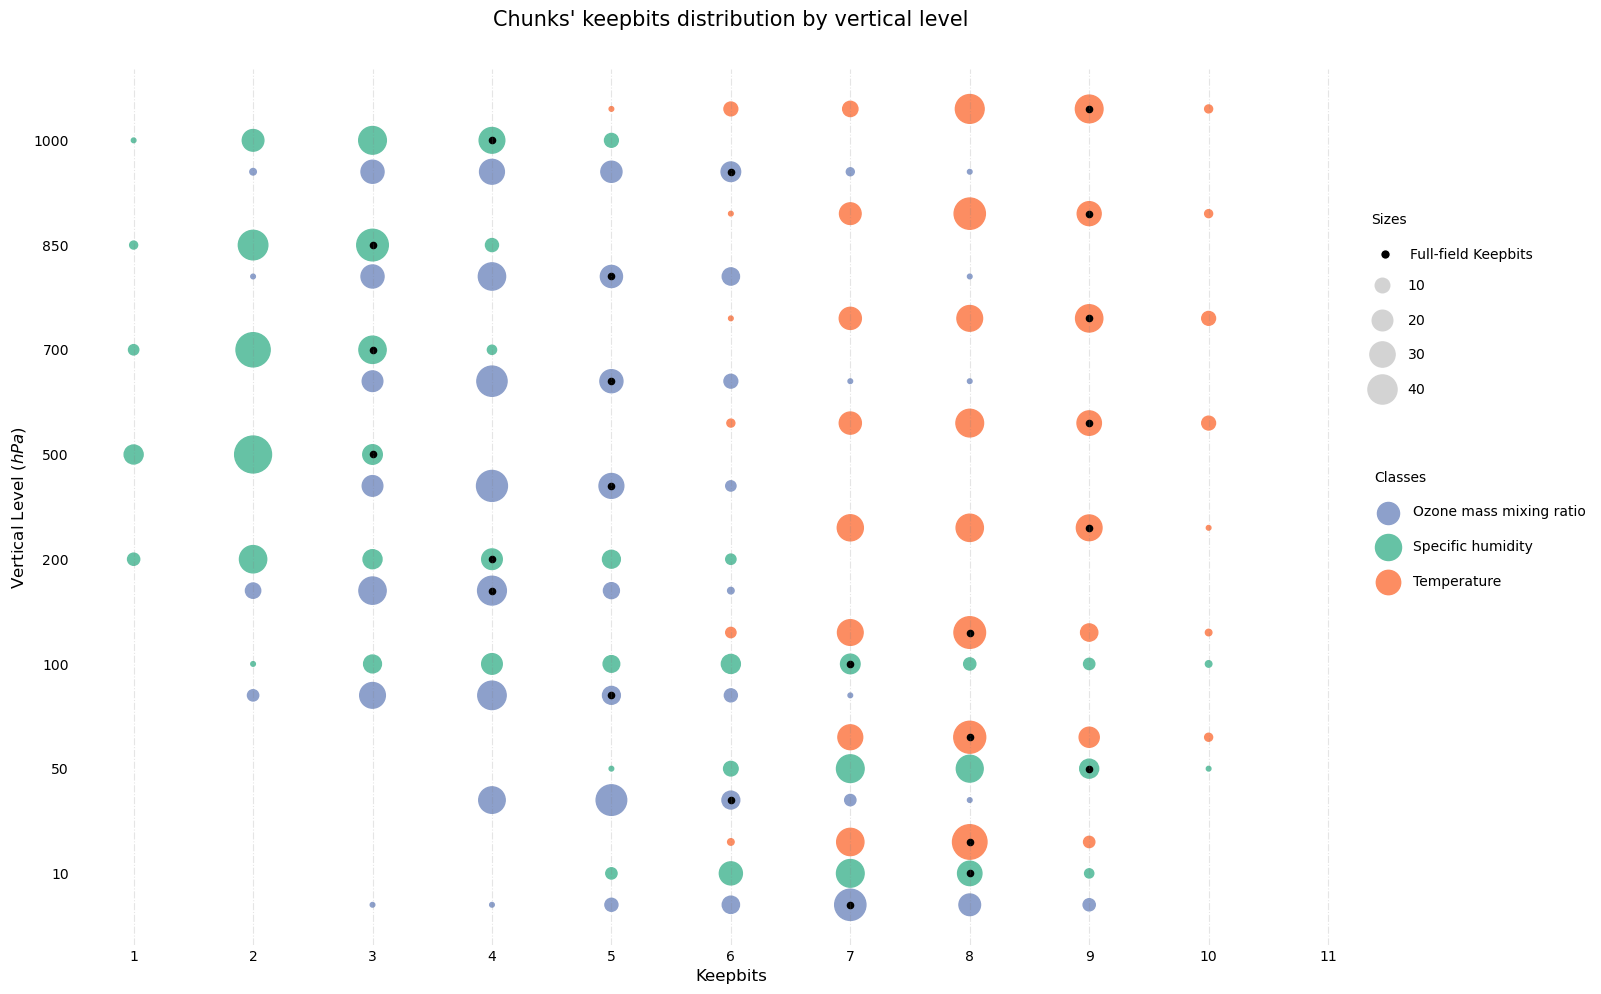

In [129]:
df = pd.read_csv('multi-lvl-go3.csv', index_col=0).apply(pd.Series.value_counts).fillna(0)
df2 = pd.read_csv('multi-lvl-q.csv', index_col=0).apply(pd.Series.value_counts).fillna(0)
df3 = pd.read_csv('multi-lvl-t.csv', index_col=0).apply(pd.Series.value_counts).fillna(0)

for i in range(1,12):
    if i not in df.index: df.loc[i] = 0
    if i not in df2.index: df2.loc[i] = 0
    if i not in df3.index: df3.loc[i] = 0
    
df.sort_index(inplace=True), df2.sort_index(inplace=True), df3.sort_index(inplace=True)

x = np.arange(1, 9)
y = np.arange(1, 12)
xx, yy = np.meshgrid(x, y)

fig, ax = plt.subplots(figsize=(16,10))

sc = ax.scatter(yy, xx-.3, s=df.values*11, c='#8da0cb', label='go3')
sc2 = ax.scatter(yy, xx, s=df2.values*11, c='#66c2a5', label='q')
sc3 = ax.scatter(yy, xx+.3, s=df3.values*11, c='#fc8d62', label='t')

sc_ = ax.scatter([i+1 for i in l_kbits[2].values()],
                 [i+.7 for i in l_kbits[2].keys()], s=20, c='k') #go3
sc2_ = ax.scatter([i+1 for i in l_kbits[0].values()],
                  [i+1 for i in l_kbits[0].keys()], s=20, c='k') #q
sc3_ = ax.scatter([i+1 for i in l_kbits[1].values()],
                  [i+1.3 for i in l_kbits[1].keys()], s=20, c='k', label='J') #t

# labels = ['Ozone mass mixing ratio', 'Specific humidity', 'Temperature']

ax.grid(color='grey', linestyle='-.', alpha=0.2, zorder=1)
plt.grid(axis = 'y')
ax.set_frame_on(False)
ax.set_ylabel('Vertical Level ($hPa$)', fontsize=12)
ax.set_xlabel('Keepbits', fontsize=12)
ax.set_yticks(range(1,9))
ax.set_xticks(range(1,12))
ax.set_yticklabels([10, 50, 100, 200, 500, 700, 850, 1000])
ax.set_title(f'Chunks\' keepbits distribution by vertical level', x=0.5, y=1.04, fontsize=15)

point = Line2D([0], [0], label='Full-field Keepbits', marker='o', markersize=7, 
         markerfacecolor='k', color='w', linestyle='')
legend3 = ax.legend(handles=[point], title="Sizes", loc="upper right",
                    bbox_to_anchor=(1.12,0.85), labelspacing=1.5,
                    frameon=False)
legend3._legend_box.align = "left"
ax.add_artist(legend3)

legend1 = ax.legend(*sc.legend_elements("sizes", num=5, func=lambda s: s/11, color="lightgrey"),
                    loc='upper right', bbox_to_anchor=(1.038,.775), labelspacing=1.5,
                    frameon=False)
legend1._legend_box.align = "left"
ax.add_artist(legend1)

legend2 = ax.legend(labels=labels, title="Classes", loc="lower right",
                    bbox_to_anchor=(1.155,0.4), labelspacing=1.5,
                    frameon=False, borderaxespad=0.)
legend2._legend_box.align = "left"

ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.savefig('inv-beeswarm-chunks-keepbits-dist-lvl.png', dpi=300)
plt.show()

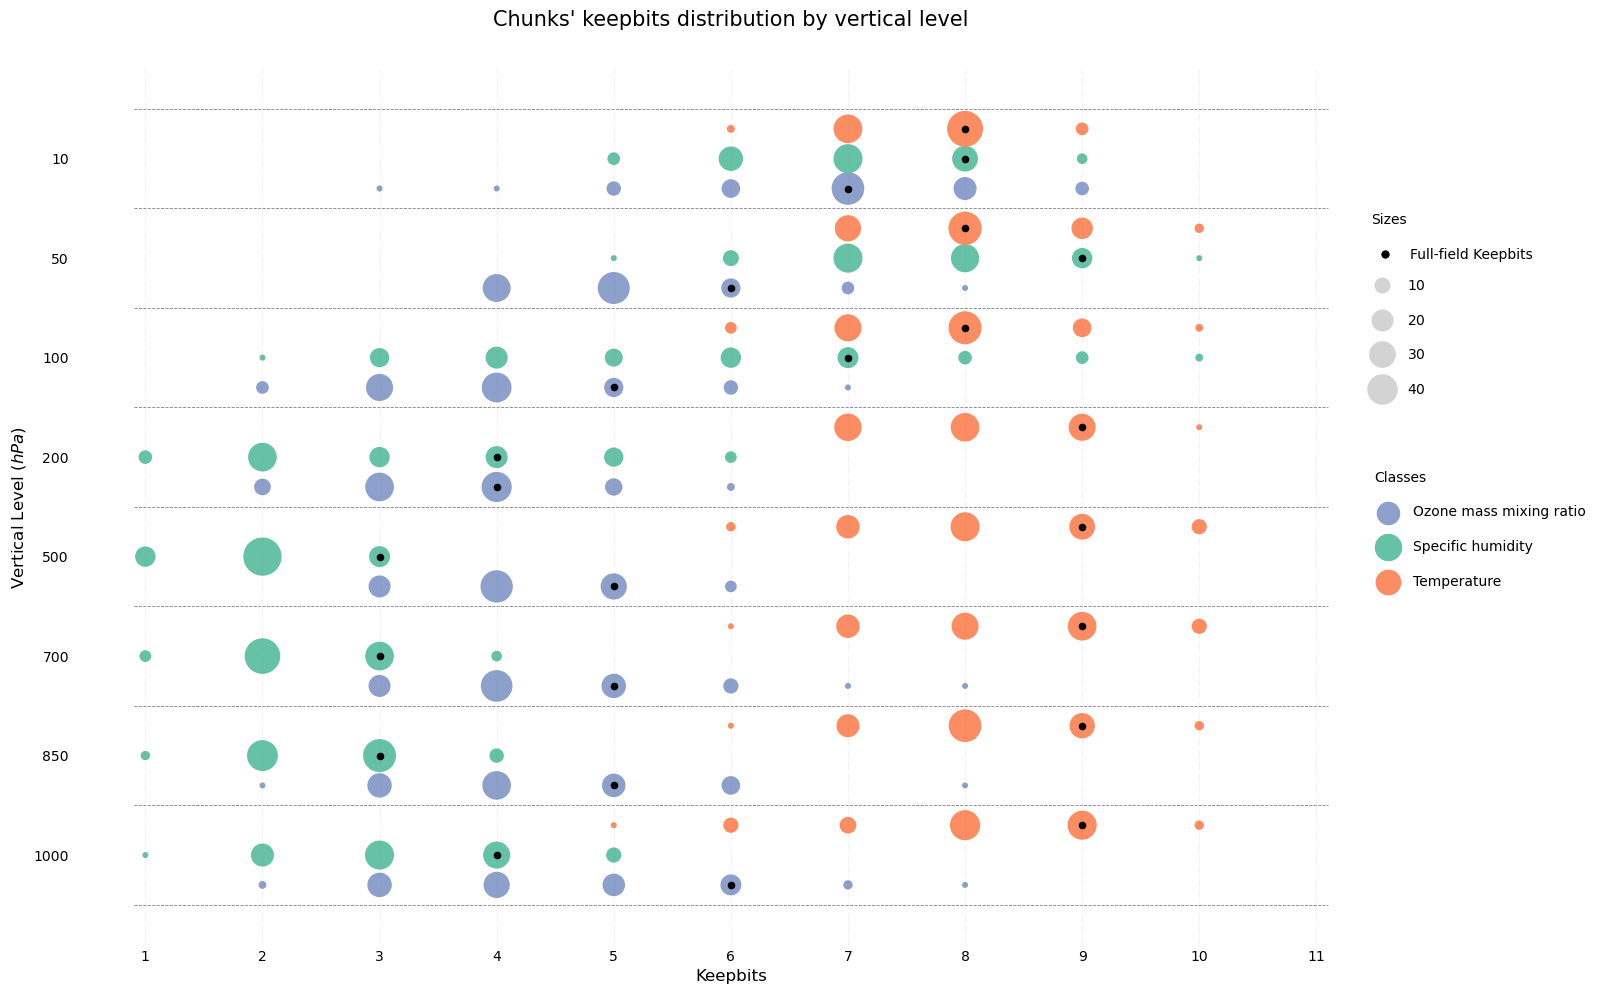

In [200]:
df = pd.read_csv('multi-lvl-go3.csv', index_col=0).apply(pd.Series.value_counts).fillna(0)
df2 = pd.read_csv('multi-lvl-q.csv', index_col=0).apply(pd.Series.value_counts).fillna(0)
df3 = pd.read_csv('multi-lvl-t.csv', index_col=0).apply(pd.Series.value_counts).fillna(0)

for i in range(1,12):
    if i not in df.index: df.loc[i] = 0
    if i not in df2.index: df2.loc[i] = 0
    if i not in df3.index: df3.loc[i] = 0
    
df.sort_index(inplace=True), df2.sort_index(inplace=True), df3.sort_index(inplace=True)

x = np.arange(8, 0, -1)
y = np.arange(1, 12)
xx, yy = np.meshgrid(x, y)

fig, ax = plt.subplots(figsize=(16,10))

sc = ax.scatter(yy, xx-.3, s=df.values*11, c='#8da0cb', label='go3')
sc2 = ax.scatter(yy, xx, s=df2.values*11, c='#66c2a5', label='q')
sc3 = ax.scatter(yy, xx+.3, s=df3.values*11, c='#fc8d62', label='t')

sc_ = ax.scatter([i+1 for i in list(l_kbits[2].values())[::-1]],
                 [i+.7 for i in l_kbits[2].keys()], s=20, c='k') #go3
sc2_ = ax.scatter([i+1 for i in list(l_kbits[0].values())[::-1]],
                  [i+1 for i in l_kbits[0].keys()], s=20, c='k') #q
sc3_ = ax.scatter([i+1 for i in list(l_kbits[1].values())[::-1]],
                  [i+1.3 for i in l_kbits[1].keys()], s=20, c='k', label='J') #t

# labels = ['Ozone mass mixing ratio', 'Specific humidity', 'Temperature']

ax.grid(color='grey', linestyle='-.', alpha=0.1, zorder=1)
plt.grid(axis = 'y')

for i in np.arange(.5, 9, 1):
    ax.hlines(y=i, xmin=0.9, xmax=11.1,
               linewidth=.6, linestyle='--', color='gray') # horizontal lines

ax.set_frame_on(False)
ax.set_ylabel('Vertical Level ($hPa$)', fontsize=12)
ax.set_xlabel('Keepbits', fontsize=12)
ax.set_yticks(range(1,9))
ax.set_xticks(np.arange(11, 0, -1))
ax.set_yticklabels([10, 50, 100, 200, 500, 700, 850, 1000][::-1])
ax.set_title(f'Chunks\' keepbits distribution by vertical level', x=0.5, y=1.04, fontsize=15)

point = Line2D([0], [0], label='Full-field Keepbits', marker='o', markersize=7, 
         markerfacecolor='k', color='w', linestyle='')
legend3 = ax.legend(handles=[point], title="Sizes", loc="upper right",
                    bbox_to_anchor=(1.12,0.85), labelspacing=1.5,
                    frameon=False)
legend3._legend_box.align = "left"
ax.add_artist(legend3)

legend1 = ax.legend(*sc.legend_elements("sizes", num=5, func=lambda s: s/11, color="lightgrey"),
                    loc='upper right', bbox_to_anchor=(1.038,.775), labelspacing=1.5,
                    frameon=False)
legend1._legend_box.align = "left"
ax.add_artist(legend1)

legend2 = ax.legend(labels=labels, title="Classes", loc="lower right",
                    bbox_to_anchor=(1.155,0.4), labelspacing=1.5,
                    frameon=False, borderaxespad=0.)
legend2._legend_box.align = "left"

ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
# plt.savefig('inv-beeswarm-chunks-keepbits-dist-lvl.png', dpi=300)
plt.show()

In [8]:
import seaborn as sns

In [201]:
df = pd.read_csv('multi-lvl-go3.csv', index_col=0)
df2 = pd.read_csv('multi-lvl-q.csv', index_col=0)
df3 = pd.read_csv('multi-lvl-t.csv', index_col=0)

for c in df.columns:
    df.rename(columns={c: c.split('-')[-1]}, inplace=True)

for c in df2.columns:
    df2.rename(columns={c: c.split('-')[-1]}, inplace=True)

for c in df3.columns:
    df3.rename(columns={c: c.split('-')[-1]}, inplace=True)

df['type'] = 'go3'
df2['type'] = 'q'
df3['type'] = 't'

df_ = pd.concat([df, df2, df3])

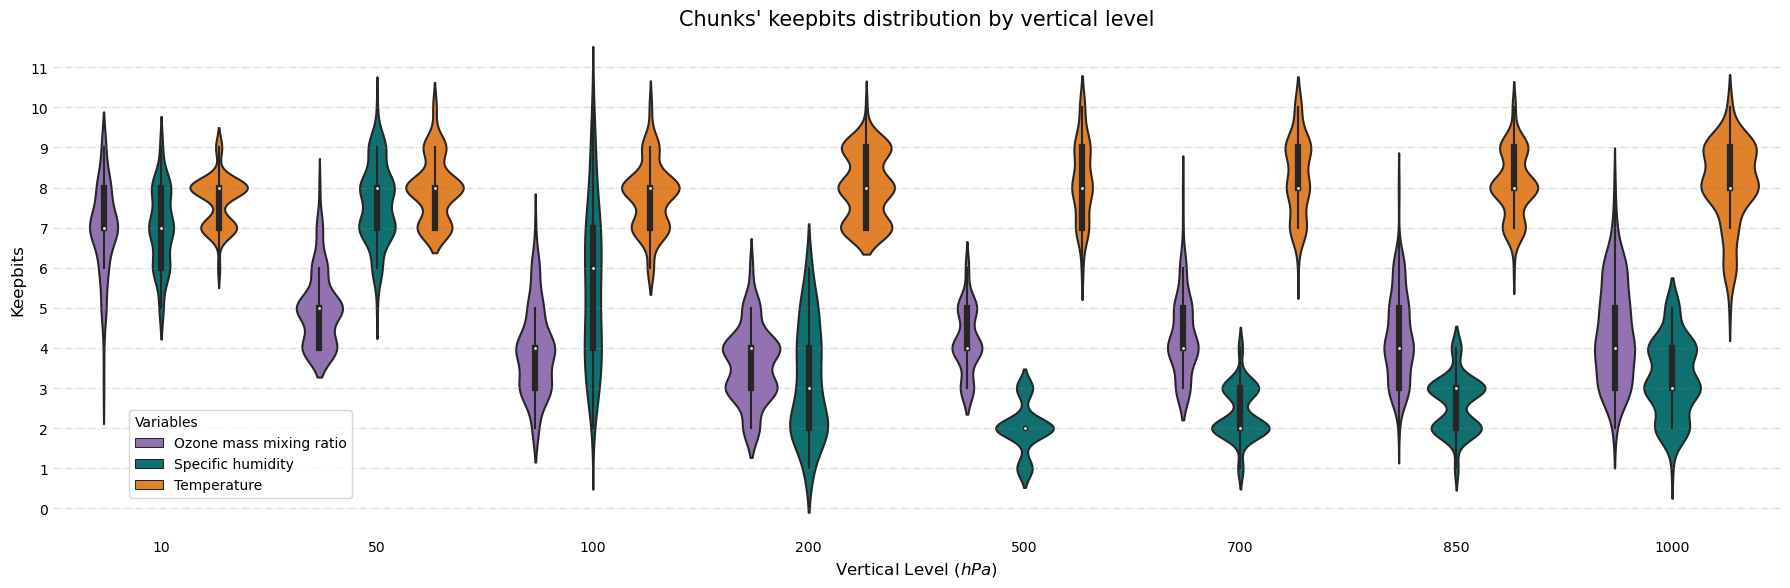

In [346]:
fig, ax = plt.subplots(figsize=(18, 6))

sns.violinplot(df_.melt(id_vars='type'), x='variable', y='value', hue='type',
               ax=ax,  palette=['C4','teal','C1'], alpha=.5)

ax.grid(color='grey', linestyle='-.', alpha=0.3, zorder=1)
ax.grid(axis = 'x')
ax.set_frame_on(False)

ax.set_yticks(np.arange(0, 12))
ax.set_xlabel('Vertical Level ($hPa$)', fontsize=12)
ax.set_ylabel('Keepbits', fontsize=12)

legend = ax.legend(title="Variables", loc="lower left", bbox_to_anchor=(0.04,.06))
legend._legend_box.align = "left"
ax.tick_params(axis=u'both', which=u'both',length=0)

labels = ['Ozone mass mixing ratio', 'Specific humidity', 'Temperature']

for i,l in enumerate(labels):
    legend.get_texts()[i].set_text(l)

ax.set_title(f'Chunks\' keepbits distribution by vertical level', x=0.5, y=.98, fontsize=15)

plt.tight_layout()
plt.savefig('violin-chunks-keepbits-dist-lvl.png', dpi=300)

plt.show()

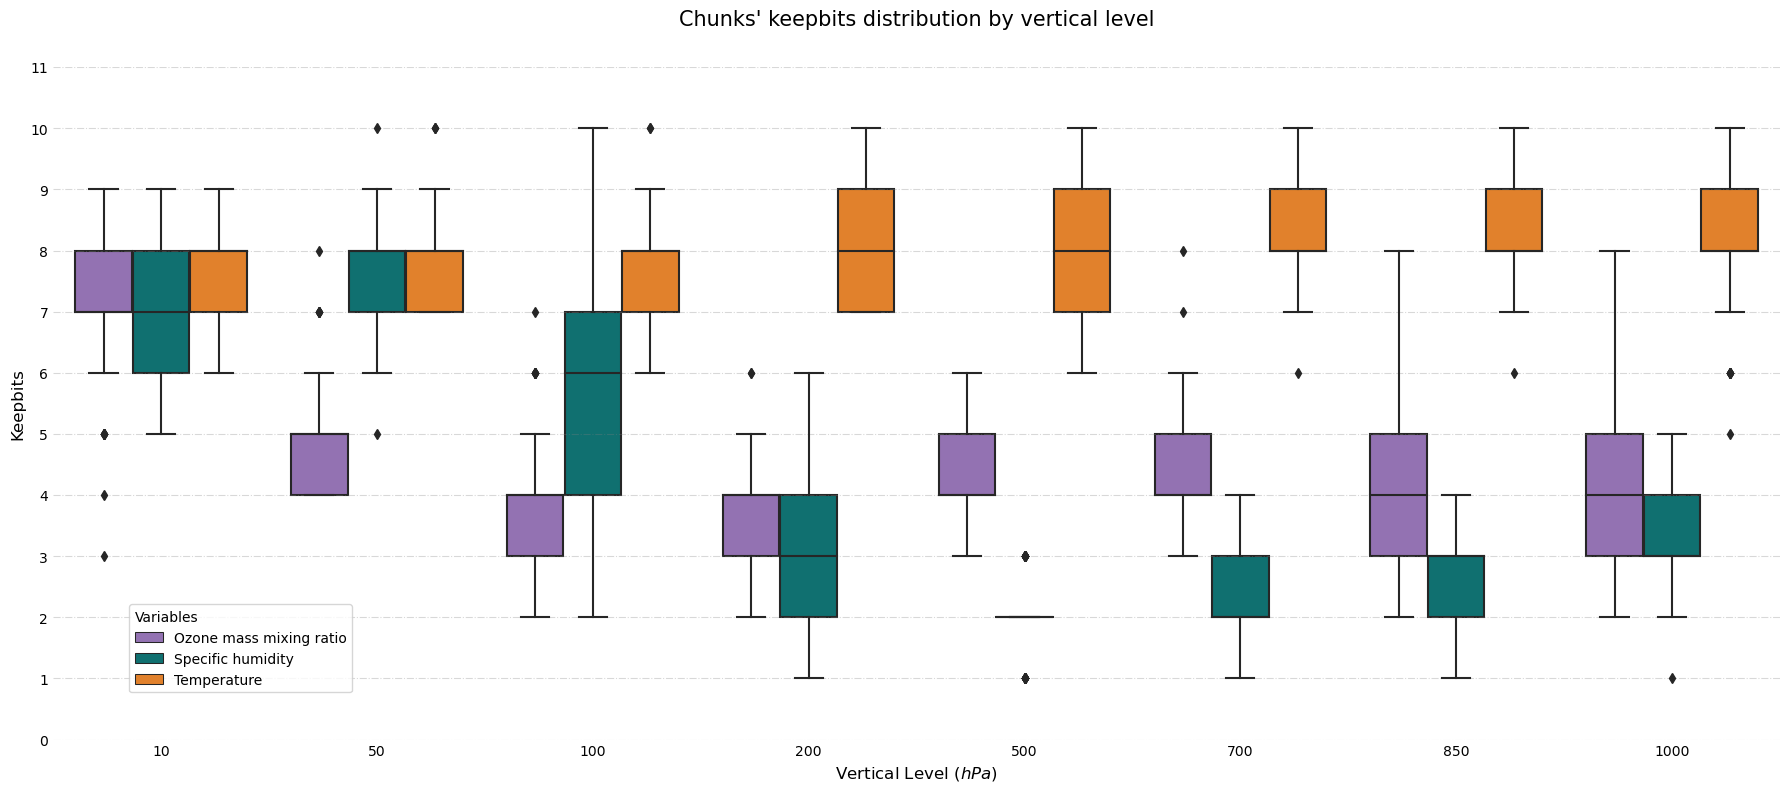

In [363]:
fig, ax = plt.subplots(figsize=(18, 8))

sns.boxplot(df_.melt(id_vars='type'), x='variable', y='value', hue='type',
               ax=ax,  palette=['C4','teal','C1'], width=.8)

ax.grid(color='grey', linestyle='-.', alpha=0.3, zorder=1)
ax.grid(axis = 'x')
ax.set_frame_on(False)

ax.set_yticks(np.arange(0, 12))
ax.set_xlabel('Vertical Level ($hPa$)', fontsize=12)
ax.set_ylabel('Keepbits', fontsize=12)

legend = ax.legend(title="Variables", loc="lower left", bbox_to_anchor=(0.04,.06))
legend._legend_box.align = "left"
ax.tick_params(axis=u'both', which=u'both',length=0)

labels = ['Ozone mass mixing ratio', 'Specific humidity', 'Temperature']

for i,l in enumerate(labels):
    legend.get_texts()[i].set_text(l)

ax.set_title(f'Chunks\' keepbits distribution by vertical level', x=0.5, y=1.05, fontsize=15)

plt.tight_layout()
plt.savefig('boxplot-chunks-keepbits-dist-lvl.png', dpi=300)
plt.show()

In [245]:
df = pd.read_csv('multi-lvl-go3.csv', index_col=0).apply(pd.Series.value_counts).fillna(0)
df2 = pd.read_csv('multi-lvl-q.csv', index_col=0).apply(pd.Series.value_counts).fillna(0)
df3 = pd.read_csv('multi-lvl-t.csv', index_col=0).apply(pd.Series.value_counts).fillna(0)

for i in range(1,12):
    if i not in df.index: df.loc[i] = 0
    if i not in df2.index: df2.loc[i] = 0
    if i not in df3.index: df3.loc[i] = 0
    
df.sort_index(inplace=True), df2.sort_index(inplace=True), df3.sort_index(inplace=True)

for c in df.columns:
    df.rename(columns={c: c.split('-')[-1]}, inplace=True)
for c in df2.columns:
    df2.rename(columns={c: c.split('-')[-1]}, inplace=True)
for c in df3.columns:
    df3.rename(columns={c: c.split('-')[-1]}, inplace=True)

1     10.00
2     10.00
3     10.01
4     10.01
5     10.08
6     10.14
7     10.46
8     10.22
9     10.07
10    10.00
11    10.00
Name: 10, dtype: float64

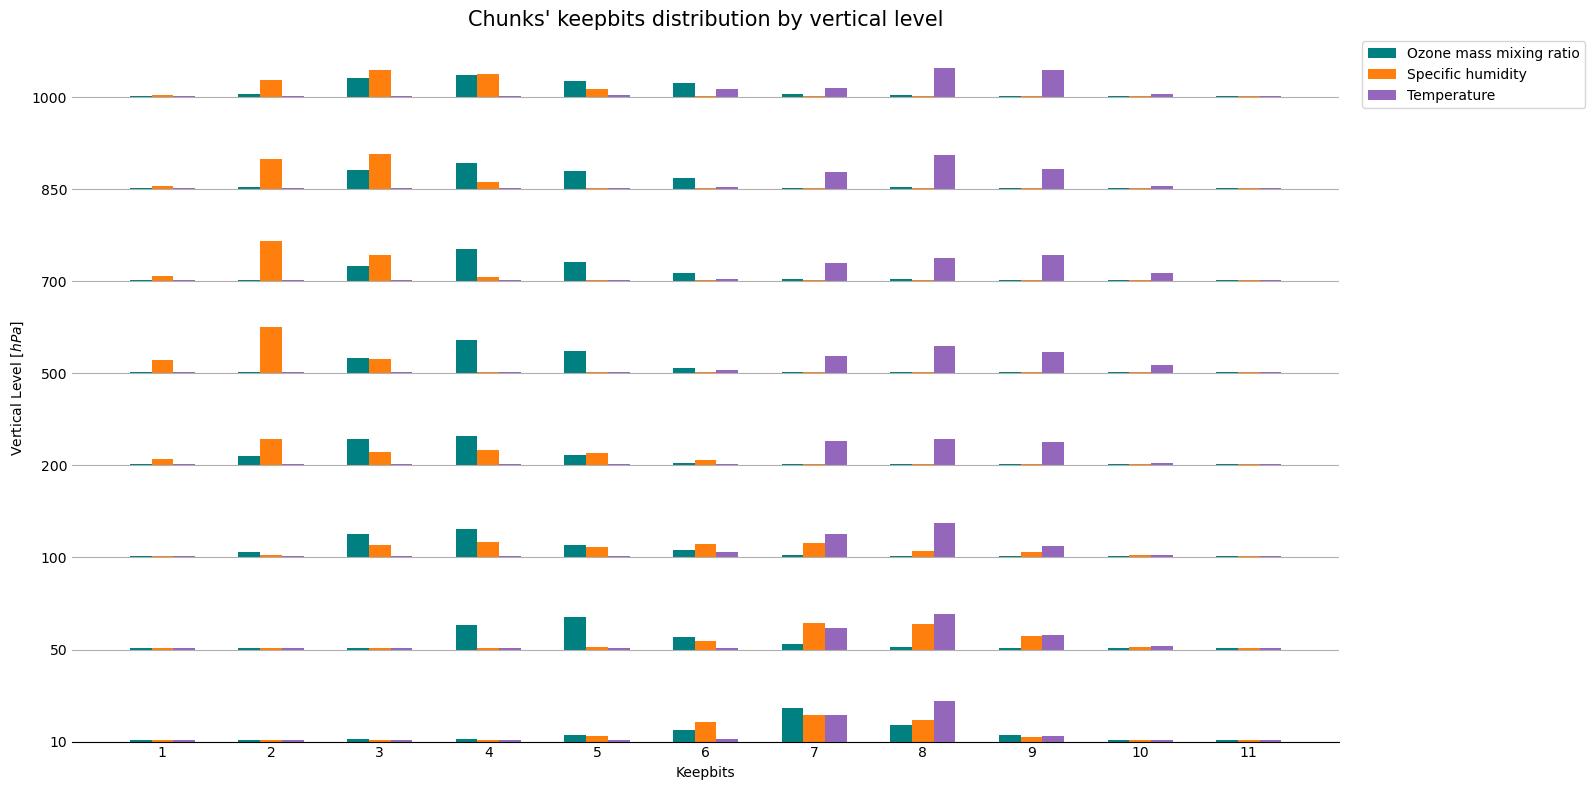

In [383]:
fig,ax = plt.subplots(1,figsize=(16,8))

n = 11
levels = list(df.columns)
nlevs = np.arange(len(levels))
offset = 0.2
width = offset
x = np.arange(1, n+1)
colours = ["teal","C1","C4"]
yoffset = 1.3

for y in nlevs:
    ax.bar(x-offset, df[f'{levels[y]}']/100 + 0.02, width, bottom=y*yoffset, color=colours[0])
    ax.bar(x, df2[f'{levels[y]}']/100 + 0.02, width, bottom=y*yoffset, color=colours[1])
    ax.bar(x+offset, df3[f'{levels[y]}']/100 + 0.02, width, bottom=y*yoffset, color=colours[2])

ax.set_yticks(yoffset*nlevs)
ax.set_yticklabels(levels)
ax.set_xticks(x)
ax.set_xlabel("Keepbits")
ax.set_ylabel("Vertical Level $[hPa]$")
ax.grid(axis="y")

from matplotlib.patches import Patch

labels = ['Ozone mass mixing ratio', 'Specific humidity', 'Temperature']

p1 = Patch(facecolor=colours[0], label=labels[0])
p2 = Patch(facecolor=colours[1], label=labels[1])
p3 = Patch(facecolor=colours[2], label=labels[2])

ax.legend(handles=[p1, p2, p3], loc="upper right",
           bbox_to_anchor=(1.2,1))
ax.spines[['right', 'top', 'left']].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_title(f'Chunks\' keepbits distribution by vertical level', x=0.5, y=1, fontsize=15)

plt.tight_layout()
plt.savefig('bars-chunks-keepbits-dist-lvl.png', dpi=300)
plt.show()